In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [110]:
df = pd.read_csv("glass.csv")

In [111]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [112]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [113]:
#this is mulyi class classification data

In [114]:
df.duplicated().sum()

1

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.duplicated().sum()

0

In [117]:
X=df.drop("Type", axis=1)

In [118]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [119]:
y=df["Type"]

In [120]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
#if we have dist in algo we use scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
print(X_train)

[[0.20939421 0.32030075 0.78396437 ... 0.20961538 0.         0.        ]
 [0.48112379 0.52030075 0.84187082 ... 0.32211538 0.         0.7254902 ]
 [0.67998244 0.07518797 0.         ... 0.85480769 0.         0.        ]
 ...
 [0.20851624 0.37744361 0.74387528 ... 0.23365385 0.         0.        ]
 [0.08077261 0.5518797  0.38752784 ... 0.17307692 0.         0.        ]
 [0.70676032 0.46165414 0.70155902 ... 0.5625     0.         0.        ]]


In [124]:
print(X_test)

[[ 0.2809482   0.34135338  0.80178174  0.33333333  0.56785714  0.33928571
   0.25096154  0.          0.21568627]
 [ 0.18261633  0.54887218  0.          0.73831776  0.5875      0.02380952
   0.31634615  0.2031746   0.        ]
 [ 0.45522388  0.34887218  0.81291759  0.18068536  0.44821429  0.11309524
   0.39038462  0.          0.33333333]
 [ 0.22300263  0.52180451  0.          0.7788162   0.65178571  0.02380952
   0.3125      0.12698413  0.17647059]
 [ 0.24495171  0.38646617  0.81069042  0.38629283  0.48571429  0.38690476
   0.21538462  0.          0.56862745]
 [ 0.72958736  0.28721805  0.          0.11838006  0.39464286  0.03571429
   0.82788462  0.          0.        ]
 [ 0.28358209  0.31278195  0.78841871  0.29283489  0.6125      0.3452381
   0.25        0.          0.        ]
 [ 0.23266023  0.40150376  0.77728285  0.38317757  0.50714286  0.39880952
   0.22019231  0.          0.19607843]
 [ 0.23266023  0.4075188   0.80400891  0.3894081   0.46071429  0.39285714
   0.21538462  0.      

In [125]:
def knn_train(X_train,y_train,X_test,K):
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)
  return pred

In [126]:
#but how would you decide no of K?
#1.heuristic method = sqrt of total record->then this is the nearest neighbour
#2.based on research = u cn take diff diff value of k, k =1 to k=n

In [127]:
import math

n=df.shape[0]
K = math.sqrt(n)
#k=14

In [128]:
K=int(K)

In [129]:
pred = knn_train(X_train,y_train,X_test,K)

In [130]:
print(pred)

[2 7 1 7 1 2 1 2 2 2 2 2 1 2 1 5 7 1 2 2 1 7 7 7 1 5 2 1 1 1 1 2 1 1 2 7 2
 1 2 2 1 5 1]


In [131]:
#accuracy score
accuracy_score(y_test,pred)

0.5581395348837209

In [132]:
K_value=range(1,21)
#ex = 21
accuracy=[]

for K in K_value:
    y_pred=knn_train(X_train,y_train,X_test,K)
    acc= accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"for this K value {K} this is my acc {acc}")

for this K value 1 this is my acc 0.7209302325581395
for this K value 2 this is my acc 0.6744186046511628
for this K value 3 this is my acc 0.6744186046511628
for this K value 4 this is my acc 0.6744186046511628
for this K value 5 this is my acc 0.6511627906976745
for this K value 6 this is my acc 0.6744186046511628
for this K value 7 this is my acc 0.6976744186046512
for this K value 8 this is my acc 0.6511627906976745
for this K value 9 this is my acc 0.627906976744186
for this K value 10 this is my acc 0.627906976744186
for this K value 11 this is my acc 0.627906976744186
for this K value 12 this is my acc 0.5581395348837209
for this K value 13 this is my acc 0.6046511627906976
for this K value 14 this is my acc 0.5581395348837209
for this K value 15 this is my acc 0.5348837209302325
for this K value 16 this is my acc 0.5581395348837209
for this K value 17 this is my acc 0.5581395348837209
for this K value 18 this is my acc 0.5581395348837209
for this K value 19 this is my acc 0.604

In [133]:
max(accuracy)

0.7209302325581395

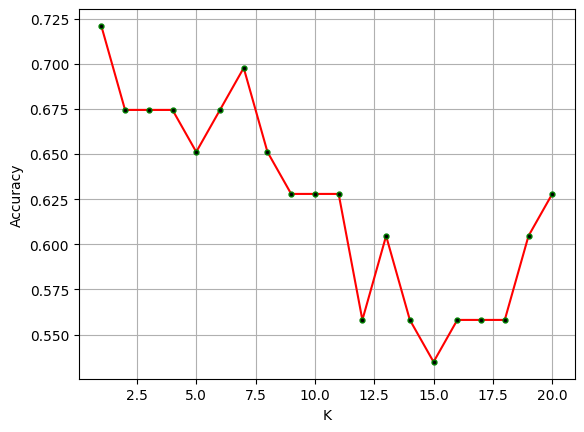

In [134]:
plt.plot(K_value,accuracy,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [135]:
#there k=1
#but condition of overfitting may arise

In [136]:
#pros
#Simple and easy to implement

##this is effective for the low-dimesion dataset(less number of features)

#in this knn we dont have the training phrase we only have the testing phase;
#whenever we add the new so we can add it without the training(lazy lerner)

#cons
#not suitable for the large dataset

##it is not sutaible for the higher dimession

#here the reason since there is no training process everything we are doing on a distance

#not sutaible for the imbalnced data

#it is not sutaible for the outlier

#it is not sutabile for the large scaled or data without scaling